# PMC Test Cases 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ctypes import *
from mpl_toolkits.mplot3d import Axes3D

%run "~\Documents\GitHub\ProjetAnnuel3IBD\projet\python\encapsulate\encapsulatePMC.py"
%run "~\Documents\GitHub\ProjetAnnuel3IBD\projet\python\encapsulate\encapsulateSharedMethods.py"
pathDLL = "C:/Users/nico_/Documents/GitHub/ProjetAnnuel3IBD/projet/MLAlgorithms/ML_Library/x64/Release/ML_Library.dll"
myDll = CDLL(pathDLL)

## Classification
- <font color=green>Linear Simple</font>

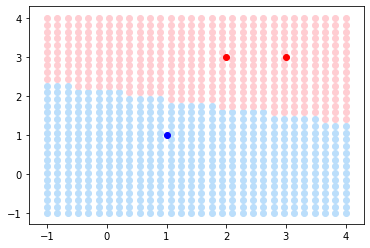

<Figure size 432x288 with 0 Axes>

In [2]:
# Points Data
Xnp = np.array([ [1, 1], [2, 3], [3, 3] ])
Ynp = np.array([ 1, -1, -1 ])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
alpha = 0.01
epochs = 1000
display = -1
pmcStruct = [2, 1]
arrStruct = (c_int * len(pmcStruct))(*pmcStruct)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate PMC Model using pmcStruct [2, 1]
pArrayWeight = createPMCModel(myDll, pmcStruct, arrStruct)

# Fit PMC with classification version
fitPMCClassification( myDll, pArrayWeight, pMatrixX, pMatrixY, Xnp.shape[0], alpha, epochs, display)

X1 = np.linspace(-1, 4, 30)
X2 = np.linspace(-1, 4, 30)

# Predict points to test if Model is working 
displayPMCClassifResult2D(myDll, pArrayWeight, X1, X2, 2)

# Display data points
plt.scatter(Xnp[0, 0], Xnp[0, 1], color='blue')
plt.scatter(Xnp[1:3,0], Xnp[1:3,1], color='red')
plt.show()
plt.clf()

# delete / free PMC Model
deletePMCModel( myDll, pArrayWeight )

- <font color=green>Linear Multiple</font>

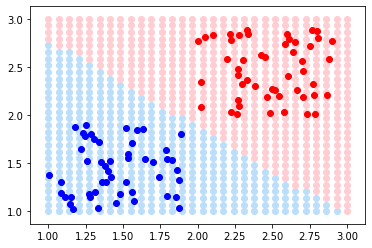

<Figure size 432x288 with 0 Axes>

In [3]:
# Points Data
Xnp = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Ynp = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])
Ynp = Ynp.flatten()

X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
alpha = 0.01
epochs = 10000
display = -1
pmcStruct = [2, 1]
arrStruct = (c_int * len(pmcStruct))(*pmcStruct)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate PMC Model using pmcStruct [2, 1]
pArrayWeight = createPMCModel(myDll, pmcStruct, arrStruct)

# Fit PMC with classification version
fitPMCClassification( myDll, pArrayWeight, pMatrixX, pMatrixY, Xnp.shape[0], alpha, epochs, display)

X1 = np.linspace(1, 3, 30)
X2 = np.linspace(1, 3, 30)

# Predict points to test if Model is working 
displayPMCClassifResult2D(myDll, pArrayWeight, X1, X2, 2)

# Display data points
plt.scatter(Xnp[0:50, 0], Xnp[0:50, 1], color='blue')
plt.scatter(Xnp[50:100,0], Xnp[50:100,1], color='red')
plt.show()
plt.clf()

# delete / free PMC Model
deletePMCModel( myDll, pArrayWeight )

- <font color=green>Linear Multiple Triple Class</font>

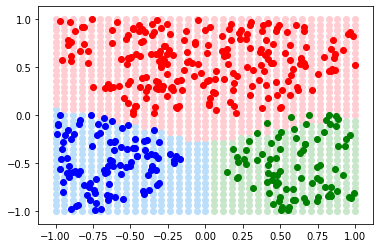

<Figure size 432x288 with 0 Axes>

In [4]:
# Points Data
Xnp = np.random.random((500, 2)) * 2.0 - 1.0
Ynp = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else #A
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else #B
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else #C
              [0, 0, 0] for p in Xnp])

X = matrixToArray(Xnp.tolist())
Y = matrixToArray(Ynp.tolist())

# Parameters
alpha = 0.001
epochs = 10000
display = -1
pmcStruct = [2, 3]
arrStruct = (c_int * len(pmcStruct))(*pmcStruct)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], Ynp.shape[1], 0)

# Create & Allocate PMC Model using pmcStruct [2, 3]
pArrayWeight = createPMCModel(myDll, pmcStruct, arrStruct)

# Fit PMC with classification version
fitPMCClassification( myDll, pArrayWeight, pMatrixX, pMatrixY, Xnp.shape[0], alpha, epochs, display)

X1 = np.linspace(-1, 1, 35)
X2 = np.linspace(-1, 1, 35)

# Predict points to test if Model is working 
displayPMCClassifResult2DTripleClass(myDll, pArrayWeight, X1, X2, 3)

# Display data points
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][0] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][0] == 1, enumerate(Xnp)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][1] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][1] == 1, enumerate(Xnp)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][2] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][2] == 1, enumerate(Xnp)))))[:,1], color='green')
plt.show()
plt.clf()

# delete / free PMC Model
deletePMCModel( myDll, pArrayWeight )


- <font color=green>Cross</font>

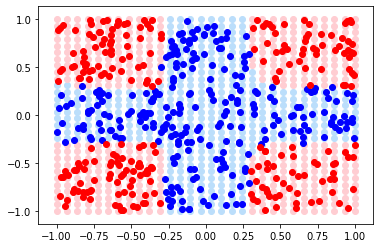

<Figure size 432x288 with 0 Axes>

In [8]:
# Points Data
Xnp = np.random.random((500, 2)) * 2.0 - 1.0
Ynp = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in Xnp])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
alpha = 0.001
epochs = 10000
display = -1
pmcStruct = [2, 4, 1]
arrStruct = (c_int * len(pmcStruct))(*pmcStruct)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate PMC Model using pmcStruct [2, 4, 1]
pArrayWeight = createPMCModel(myDll, pmcStruct, arrStruct)

# Fit PMC with classification version
fitPMCClassification( myDll, pArrayWeight, pMatrixX, pMatrixY, Xnp.shape[0], alpha, epochs, display)

X1 = np.linspace(-1, 1, 30)
X2 = np.linspace(-1, 1, 30)

# Predict points to test if Model is working 
displayPMCClassifResult2D(myDll, pArrayWeight, X1, X2, 2)

# Display data points
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]] == 1, enumerate(Xnp)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]] == -1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]] == -1, enumerate(Xnp)))))[:,1], color='red')
plt.show()
plt.clf()

# delete / free PMC Model
deletePMCModel( myDll, pArrayWeight )


- <font color=green>Multi Cross</font>

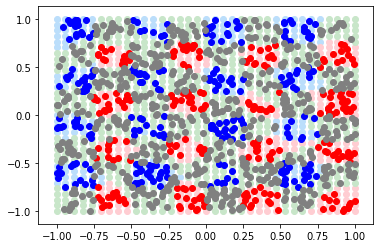

<Figure size 432x288 with 0 Axes>

In [9]:
# Points Data
Xnp = np.random.random((1000, 2)) * 2.0 - 1.0
Ynp = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else 
              [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else 
              [0, 0, 1] for p in Xnp])
X = matrixToArray(Xnp.tolist())
Y = matrixToArray(Ynp.tolist())

# Parameters
alpha = 0.001
epochs = 10000
display = -1
pmcStruct = [2, 24, 24, 3]
arrStruct = (c_int * len(pmcStruct))(*pmcStruct)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], Ynp.shape[1], 0)

# Create & Allocate PMC Model using pmcStruct [2, 4, 1]
pArrayWeight = createPMCModel(myDll, pmcStruct, arrStruct)

# Fit PMC with classification version
fitPMCClassification( myDll, pArrayWeight, pMatrixX, pMatrixY, Xnp.shape[0], alpha, epochs, display)

X1 = np.linspace(-1, 1, 35)
X2 = np.linspace(-1, 1, 35)

# Predict points to test if Model is working 
displayPMCClassifResult2DTripleClass(myDll, pArrayWeight, X1, X2, 3)

# Display data points
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][0] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][0] == 1, enumerate(Xnp)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][1] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][1] == 1, enumerate(Xnp)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][2] == 1, enumerate(Xnp)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Ynp[c[0]][2] == 1, enumerate(Xnp)))))[:,1], color='grey')
plt.show()
plt.clf()

# delete / free PMC Model
deletePMCModel( myDll, pArrayWeight )

- <font color=green>Xor</font>

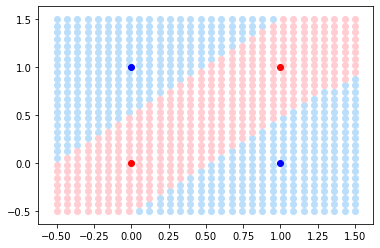

<Figure size 432x288 with 0 Axes>

In [13]:
# Points Data
Xnp = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Ynp = np.array([1, 1, -1, -1])

X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
alpha = 0.001
epochs = 100000
display = -1
pmcStruct = [2, 2, 1]
arrStruct = (c_int * len(pmcStruct))(*pmcStruct)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate PMC Model using pmcStruct [2, 2, 1]
pArrayWeight = createPMCModel(myDll, pmcStruct, arrStruct)

# Fit PMC with classification version
fitPMCClassification( myDll, pArrayWeight, pMatrixX, pMatrixY, Xnp.shape[0], alpha, epochs, display)

X1 = np.linspace(-0.5, 1.5, 30)
X2 = np.linspace(-0.5, 1.5, 30)

# Predict points to test if Model is working 
displayPMCClassifResult2D(myDll, pArrayWeight, X1, X2, 2)

# Display data points
plt.scatter(Xnp[0:2, 0], Xnp[0:2, 1], color='blue')
plt.scatter(Xnp[2:4,0], Xnp[2:4,1], color='red')
plt.show()
plt.clf()

# delete / free PMC Model
deletePMCModel( myDll, pArrayWeight )


## Regression
- <font color=green>Linear Simple 2D</font>

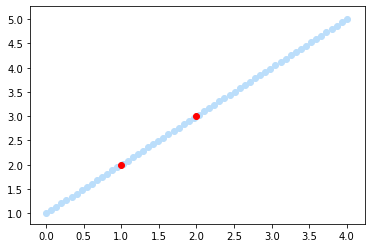

<Figure size 432x288 with 0 Axes>

In [14]:
# Points Data
X = [ 1, 2 ]
Y = [ 2, 3 ]
Xnp = np.array([ [1], [2] ])
Ynp = np.array([ 2, 3])

# Parameters
alpha = 0.1
epochs = 1000
display = -1
pmcStruct = [1, 1]
arrStruct = (c_int * len(pmcStruct))(*pmcStruct)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate PMC Model using pmcStruct [1, 1]
pArrayWeight = createPMCModel(myDll, pmcStruct, arrStruct)

# Fit PMC with regression version
fitPMCRegression( myDll, pArrayWeight, pMatrixX, pMatrixY, Xnp.shape[0], alpha, epochs, display)

X1 = np.linspace(0, 4, 60)

displayPMCRegResult2D(myDll, pArrayWeight, X1, 1)

# Display data points
plt.scatter(X, Y, color='red')
plt.show()
plt.clf()

# delete / free PMC Model
deletePMCModel( myDll, pArrayWeight )



- <font color=green> Not Linear Simple 2D</font>

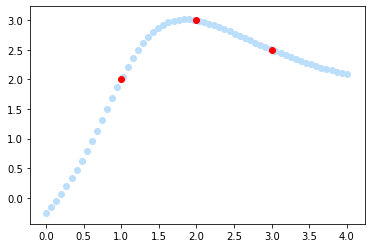

<Figure size 432x288 with 0 Axes>

In [16]:
# Points Data
Xnp = np.array([ [1], [2], [3] ])
Ynp = np.array([ 2, 3, 2.5])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
alpha = 0.01
epochs = 10000
display = -1
pmcStruct = [1, 4, 1]
arrStruct = (c_int * len(pmcStruct))(*pmcStruct)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate PMC Model using pmcStruct [1, 4, 1]
pArrayWeight = createPMCModel(myDll, pmcStruct, arrStruct)

# Fit PMC with regression version
fitPMCRegression( myDll, pArrayWeight, pMatrixX, pMatrixY, Xnp.shape[0], alpha, epochs, display)

X1 = np.linspace(0, 4, 60)

displayPMCRegResult2D(myDll, pArrayWeight, X1, 1)

# Display data points
plt.scatter(X, Y, color='red')
plt.show()
plt.clf()

# delete / free PMC Model
deletePMCModel( myDll, pArrayWeight )

- <font color=green>Linear Simple 3D n°1</font>

In [10]:
%matplotlib notebook

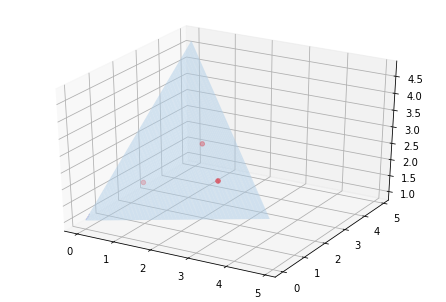

In [17]:
# Points Data
Xnp = np.array([ [1, 1], [2, 2], [3, 1] ])
Ynp = np.array([ 2, 3, 2.5 ])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
alpha = 0.01
epochs = 10000
display = -1
pmcStruct = [2,  1]
arrStruct = (c_int * len(pmcStruct))(*pmcStruct)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate PMC Model using pmcStruct [2, 1]
pArrayWeight = createPMCModel(myDll, pmcStruct, arrStruct)

# Fit PMC with regression version
fitPMCRegression( myDll, pArrayWeight, pMatrixX, pMatrixY, Xnp.shape[0], alpha, epochs, display)

fig = plt.figure()
ax = Axes3D(fig)

displayPMCRegResult3D(myDll, pArrayWeight, ax, 500, 1)

ax.scatter(Xnp[:,0], Xnp[:,1], Y, color="red")

# delete / free PMC Model
deletePMCModel( myDll, pArrayWeight )

- <font color=green>Linear Simple 3D n°2</font>

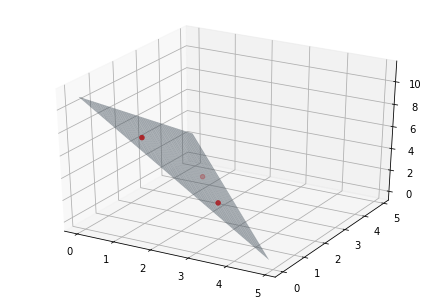

In [18]:
# Points Data
Xnp = np.array([ [1, 1], [2, 2], [3, 1] ])
Ynp = np.array([ 7, 3, 2.5 ])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()


# Parameters
alpha = 0.01
epochs = 10000
display = -1
pmcStruct = [2,  1]
arrStruct = (c_int * len(pmcStruct))(*pmcStruct)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate PMC Model using pmcStruct [2, 1]
pArrayWeight = createPMCModel(myDll, pmcStruct, arrStruct)

# Fit PMC with regression version
fitPMCRegression( myDll, pArrayWeight, pMatrixX, pMatrixY, Xnp.shape[0], alpha, epochs, display)

fig = plt.figure()
ax = Axes3D(fig)

displayPMCRegResult3D(myDll, pArrayWeight, ax, 500, 1)

ax.scatter(Xnp[:,0], Xnp[:,1], Y, color="red")

# delete / free PMC Model
deletePMCModel( myDll, pArrayWeight )

- <font color=green>Linear Simple 3D n°3</font>

<IPython.core.display.Javascript object>


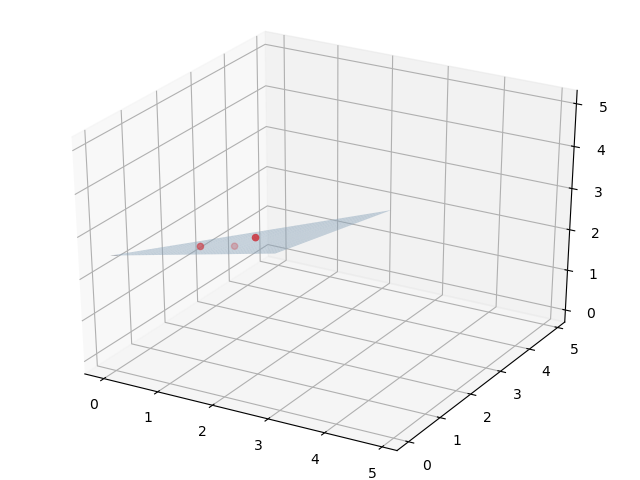

In [13]:
# Points Data
Xnp = np.array([ [1, 2], [2, 1], [1, 1] ])
Ynp = np.array([ 2, 3, 2.5 ])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
alpha = 0.01
epochs = 10000
display = -1
pmcStruct = [2,  1]
arrStruct = (c_int * len(pmcStruct))(*pmcStruct)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate PMC Model using pmcStruct [2, 1]
pArrayWeight = createPMCModel(myDll, pmcStruct, arrStruct)

# Fit PMC with regression version
fitPMCRegression( myDll, pArrayWeight, pMatrixX, pMatrixY, Xnp.shape[0], alpha, epochs, display)

fig = plt.figure()
ax = Axes3D(fig)

displayPMCRegResult3D(myDll, pArrayWeight, ax, 500, 1)

ax.scatter(Xnp[:,0], Xnp[:,1], Y, color="red")

# delete / free PMC Model
deletePMCModel( myDll, pArrayWeight )

- <font color=green>Linear Tricky 3D</font>

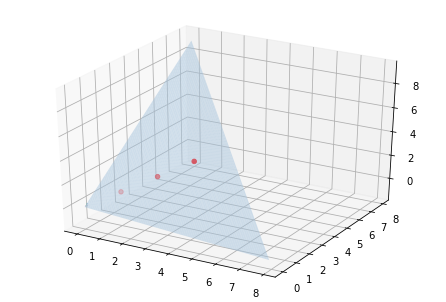

In [19]:
# Points Data
Xnp = np.array([ [1, 1], [2, 2], [3, 3] ])
Ynp = np.array([ 1, 2, 3 ])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
alpha = 0.01
epochs = 10000
display = -1
pmcStruct = [2,  1]
arrStruct = (c_int * len(pmcStruct))(*pmcStruct)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate PMC Model using pmcStruct [2, 1]
pArrayWeight = createPMCModel(myDll, pmcStruct, arrStruct)

# Fit PMC with regression version
fitPMCRegression( myDll, pArrayWeight, pMatrixX, pMatrixY, Xnp.shape[0], alpha, epochs, display)

fig = plt.figure()
ax = Axes3D(fig)

displayPMCRegResult3D(myDll, pArrayWeight, ax, 800, 1)

ax.scatter(Xnp[:,0], Xnp[:,1], Y, color="red")

# delete / free PMC Model
deletePMCModel( myDll, pArrayWeight )

- <font color=red>Not Linear Simple 3D</font>

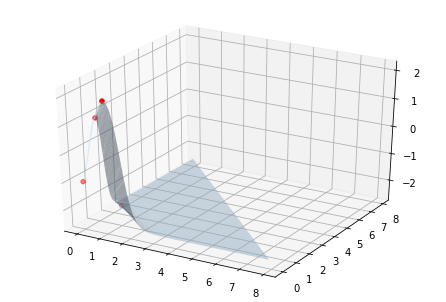

In [22]:
# Points Data
Xnp = np.array([ [1, 0], [0, 1], [1, 1], [0, 0] ])
Ynp = np.array([ 2, 1, -2, -1 ])
X = matrixToArray(Xnp.tolist())
Y = Ynp.tolist()

# Parameters
alpha = 0.01
epochs = 10000
display = int(epochs / 10)
pmcStruct = [2, 2, 1]
arrStruct = (c_int * len(pmcStruct))(*pmcStruct)

fig = plt.figure()
ax = Axes3D(fig)

# Load Matrix X
pMatrixX = loadTestCase(myDll, X, Xnp.shape[0], Xnp.shape[1], 1)

# Load Matrix Y
pMatrixY = loadTestCase(myDll, Y, Ynp.shape[0], 1, 0)

# Create & Allocate PMC Model using pmcStruct [2, 2, 1]
pArrayWeight = createPMCModel(myDll, pmcStruct, arrStruct)

# Fit PMC with regression version
fitPMCRegression( myDll, pArrayWeight, pMatrixX, pMatrixY, Xnp.shape[0], alpha, epochs, display)
displayPMCRegResult3D(myDll, pArrayWeight, ax, 800, 1)

ax.scatter(Xnp[:,0], Xnp[:,1], Y, color="red")

# delete / free PMC Model
deletePMCModel( myDll, pArrayWeight )
